# Scénario de ce projet :

Vous avez une entreprise de développement d'applications web et votre nouveau projet concerne la création d'une application qui met en relation des vendeurs de voiture d'occasion et des potentiels clients. Vous aimeriez ajouter une nouvelle fonctionnalité à cette application, celle de de donner la possibilité aux utilisateurs de l'application de connaître le prix correcte auquel ils peuvent acheter ou vendre une voiture d'occasion d'après les caractéristiques qu'ils souhaitent afin de ne pas se faire arnaquer par des vendeurs.

Ensuite l'application devra avertir un potentiel acheteur si la voiture qui l'intéresse est au prix "juste" et aussi avertir un vendeur si le prix auquel il veut vendre sa voiture est correcte.

Après avoir collecté des données des caractéristiques de plusieurs centaines de voitures d'occasion ainsi que leurs prix de vente sur des plateformes dédiées, vous décidez donc de construire un modèle de Machine Learning capable de prédire le prix d'une voiture en fonction de ses caractéristiques.

# ________________________ IMPLEMENTATION ________________________

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#  1. Import DataSet

In [2]:
#import data
data= pd.read_csv('data.csv')
#display data
data.head()

,curb-weight,price
0,2548,13495
1,2548,16500
2,2823,16500
3,2337,13950
4,2824,17450


# 2.Data visualization

In [3]:
#specify X (feature)
X= data['curb-weight']
#specify y (target)
y= data['price']


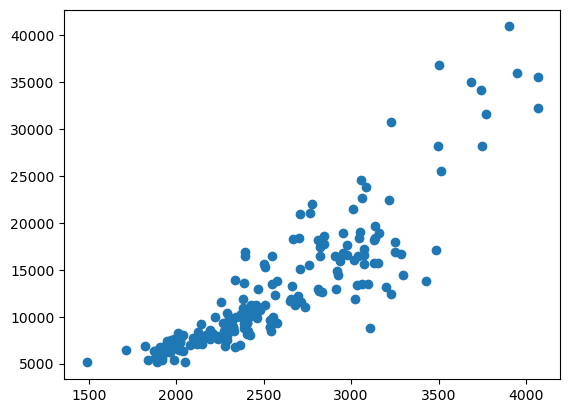

In [4]:
#visualization
plt.scatter(X, y)

# 3.data preparation

In [5]:
#transform X to numpy array
X= data['curb-weight'].to_numpy()
#transform y to numpy array
y= data['price'].to_numpy()

In [6]:
#display data dimensioning
print(X.shape)
print(y.shape)

(196,)
(196,)


In [7]:
#reshape the dimensioning
X= X.reshape((X.shape[0], 1))
y= y.reshape((y.shape[0],1))

In [8]:
#display again the data dimensioning
print(X.shape)
print(y.shape)

(196, 1)
(196, 1)


In [9]:
#why this row ?
scaler_X= MinMaxScaler()
X= scaler_X.fit_transform(X)

scaler_y= MinMaxScaler()
y= scaler_y.fit_transform(y)

In [10]:
# add column of ones
X= np.hstack((X**2,X, np.ones(X.shape)))


In [11]:
#initialized the parameter theta (random)
theta = np.random.randn(3, 1)

# 4.Model

In [12]:
def model(X, theta):
    #write your code here
    return X.dot(theta)

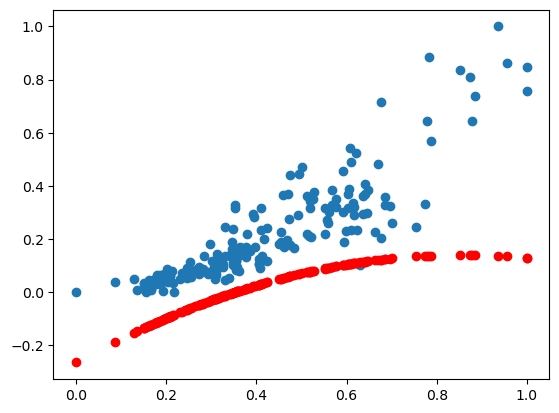

In [13]:
#visualization data
plt.scatter(X[:,1], y)
#visualization model (c='r')
plt.scatter(X[:,1], model(X, theta), c='r')

# 5.Cost Function

In [14]:
def cost_function(X, y, theta):
    #write your code here 
    m= len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

# 6.Gradients and Gradient Descent

In [15]:
def grad(X, y, theta) :
    #write your code here
    m= len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [16]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history= np.zeros(n_iterations)
    #write your code here
    for i in range(n_iterations):
        cost_history[i]= cost_function(X, y, theta)
        theta= theta - learning_rate*grad(X, y, theta)
        
    return theta, cost_history

# 7.Training

In [30]:
#call minimization function
theta_final, cost_history = gradient_descent(X, y, theta, 0.3, 10000)

In [31]:
#display the final parameter theta
theta_final

array([[ 0.70647454],
       [ 0.17523432],
       [-0.0096479 ]])

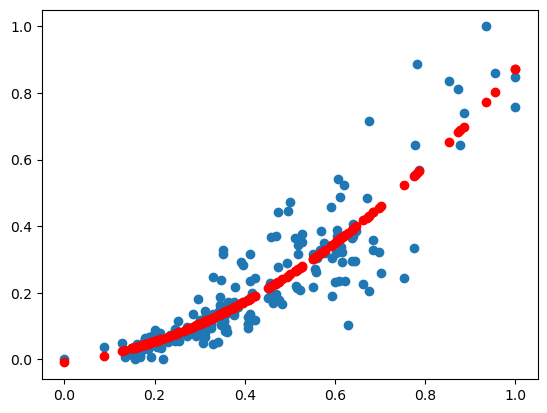

In [32]:
#get model
predictions= model(X, theta_final)
#visualization data
plt.scatter(X[:, 1], y)
#visualization model (c='r')
plt.scatter(X[:, 1], predictions, c='r')

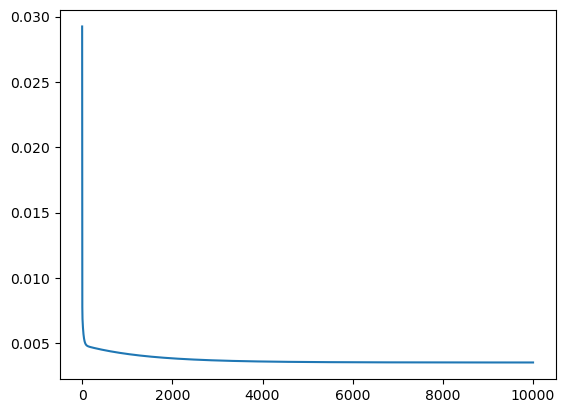

In [33]:
#visualization cost_history
plt.plot(range(10000), cost_history)

In [34]:
#get model performance
def coef_determination(y, pred):
    u= ((y - pred)**2).sum()
    v= ((y - y.mean())**2).sum()
    return 1 - (u/v)

In [35]:
#call coef_determination function
coef_determination(y, predictions)

0.8103403838956103

# scikit learn library

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
#create model
model_= LinearRegression()

In [25]:
#training the model
model_.fit(data[['curb-weight']], data['price'])

LinearRegression()

In [26]:
#get model performance
model_.score(data[['curb-weight']], data['price'])

0.7753995907018842

In [36]:
#predict some data
df= pd.DataFrame({'curb-weight':[2800, 2500]})
model_.predict(df)

array([15636.88481519, 12070.85632766])

# 8.Deployment

In [37]:
import joblib

In [38]:
#deploy model
joblib.dump(value=model_, filename='price_car_predictions.pkl')

['price_car_predictions.pkl']

In [39]:
m= joblib.load( filename='price_car_predictions.pkl')
df= pd.DataFrame({'curb-weight':[2800, 2500]})
m.predict(df)

array([15636.88481519, 12070.85632766])